<a href="https://colab.research.google.com/github/safreitas2000/ml-analytics-mvp/blob/main/BERT_MVP_V04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 90.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 120.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 43.1 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Fo

In [67]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout
import tensorflow_hub as hub
import tensorflow_text as text

In [90]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/safreitas2000/ml-analytics-mvp/main/20191226-reviews.csv"

# Lê o arquivo
df = pd.read_csv(url, delimiter=',', encoding='latin-1')
df.head(5)

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [91]:
df = df.head(10000)

In [92]:
df = df.dropna()
df = df.reset_index(drop=True)

In [93]:
rat=df.rating.value_counts()
rat

5    1854
1     642
4     510
3     291
2     238
Name: rating, dtype: int64

In [94]:
import matplotlib.pyplot as plt

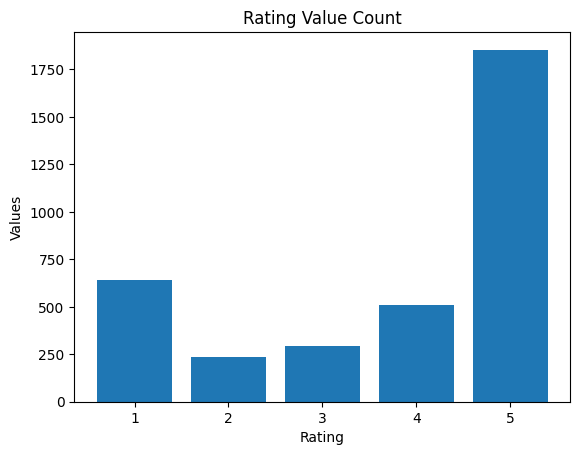

In [95]:
fig, ax = plt.subplots()
ax.bar(rat.index, rat.values)

# Set labels and title
ax.set_xlabel('Rating')
ax.set_ylabel('Values')
ax.set_title('Rating Value Count')

# Display the plot
plt.show()

In [97]:
import re
df["rating"] = df["rating"].astype(int)

In [98]:
mapping={1:0,2:0,3:None,4:1,5:1}
df.rating=df.rating.map(mapping)
df=df.dropna(subset='rating')

In [99]:
df["body"] = df["body"].str.encode("ascii", "ignore").str.decode("utf-8")

<ipython-input-99-a5dea9ad49dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["body"] = df["body"].str.encode("ascii", "ignore").str.decode("utf-8")


In [100]:
df = df[["body", "rating"]]

In [101]:
df.head(10)

,body,rating
1,Due to a software issue between Nokia and Spri...,0.0
2,"This is a great, reliable phone. I also purcha...",1.0
4,The phone has been great for every purpose it ...,1.0
5,Cool. Cheap. Color: 3 words that describe the ...,1.0
6,"The 3599i is overall a nice phone, except that...",1.0
7,"I've never owned a Nokia phone before, so this...",1.0
9,I've had this phone for over a year and I real...,1.0
10,1.) Slow - If you want to check your missed ca...,0.0
11,I bought this phone about a year ago and have ...,0.0
12,This is an excellent choice for Sprint to use ...,1.0


In [102]:
X_train, X_test, y_train, y_test = train_test_split(df.body,df.rating,test_size=0.2)

In [103]:
X_train.shape

(2595,)

In [104]:
X_test.shape

(649,)

In [105]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [106]:
df.head(10)

,body,rating
1,Due to a software issue between Nokia and Spri...,0.0
2,"This is a great, reliable phone. I also purcha...",1.0
4,The phone has been great for every purpose it ...,1.0
5,Cool. Cheap. Color: 3 words that describe the ...,1.0
6,"The 3599i is overall a nice phone, except that...",1.0
7,"I've never owned a Nokia phone before, so this...",1.0
9,I've had this phone for over a year and I real...,1.0
10,1.) Slow - If you want to check your missed ca...,0.0
11,I bought this phone about a year ago and have ...,0.0
12,This is an excellent choice for Sprint to use ...,1.0


In [107]:
df.body[1]

'Due to a software issue between Nokia and Sprint this phone\'s text messaging capabilities don\'t work with Sprint\'s system and won\'t until a software patch comes out "some time in the next few months". You will have to spend at least 1 hour with Sprint\'s award winning customer service team to find someone who will admit this to you. The problem is that Nokia designed their phones so that incoming messages are retrieved quickly and then viewed "offline" the way most providers work. Sprint, however, likes to have people hook up to their server first and then stay connected, burning minutes while they check their inbox, compose a reply and wait for the Sprint server to respond so they can send it out. Innovation in money-making at its finest.'

In [108]:
def get_sentense_embeding(sentences):
    preprocesed_text=bert_preprocess(sentences)
    return bert_encoder(preprocesed_text)['pooled_output']
get_sentense_embeding([
    df.body[5],df.body[1]
])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.66974694, -0.55856156, -0.9775242 , ..., -0.939019  ,
        -0.6770846 ,  0.6674904 ],
       [-0.78146726, -0.6098954 , -0.9507825 , ..., -0.92656064,
        -0.7495821 ,  0.5948985 ]], dtype=float32)>

In [109]:
text_input=tf.keras.layers.Input(shape=(),dtype=tf.string,name='text')
preprocessed_text=bert_preprocess(text_input)
outputs=bert_encoder(preprocessed_text)
l=tf.keras.layers.Dropout(0.1,name='dropout')(outputs['pooled_output'])
l=tf.keras.layers.Dense(1,activation='sigmoid',name='output')(l)

model=tf.keras.Model(inputs=[text_input],outputs=[l])

In [110]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer_10 (KerasLayer  {'input_word_ids': (None,    0         ['text[0][0]']                
 )                           128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_type_ids': (None,                                           
                              128)}                                                               
                                                                                            

In [111]:
METRICS=[
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=METRICS)

In [123]:
model.fit(X_train,y_train,epochs=4)

Epoch 1/4
82/82 [==============================] - 26s 316ms/step - loss: 0.5487 - accuracy: 0.7380 - precision: 0.7382 - recall: 0.9937
Epoch 2/4
82/82 [==============================] - 26s 321ms/step - loss: 0.5229 - accuracy: 0.7472 - precision: 0.7466 - recall: 0.9900
Epoch 3/4
82/82 [==============================] - 26s 315ms/step - loss: 0.5017 - accuracy: 0.7580 - precision: 0.7571 - recall: 0.9847
Epoch 4/4
82/82 [==============================] - 26s 315ms/step - loss: 0.4771 - accuracy: 0.7696 - precision: 0.7669 - recall: 0.9836


In [125]:
print(X_test)

3032                                          Super Note!
1725    This is a beast. I get 28Gb to use in 32Gb but...
2590    Awesome phone. Rootable, but can't install cus...
1837    Although it works it Verizon network, they are...
2705    This phone is a great way to down grade from a...
                              ...                        
1161    yo this phone is really good its gsm unlock ju...
2974    This is an excellent phone. I could sit here a...
2852    Hands down the best phone I have ever owned. T...
2133                                   SIMPLY THE MAXIMUM
3226    This Samsung phone has all the basic features....
Name: body, Length: 649, dtype: object


In [126]:
print(X_train)

256     It seems like the seller(s?) don't know the di...
2481    A step up from the iPhone 5. W8 is a much bett...
3084    Before giving my opinion and experiences with ...
148     I wasted the $90 I spent on this phone. The ke...
585     I loved this phone over other similar sized an...
                              ...                        
2140    Ruggedness and being IP67 were the main reaaso...
416     i have only had this net ten phone for two mon...
2086    I love this phone. I previously had the Samsun...
1857    This is a wonderful step up from my Nokia 520....
3048                                              Perfect
Name: body, Length: 2595, dtype: object


In [129]:
model.evaluate(X_test,y_test)

21/21 [==============================] - 7s 308ms/step - loss: 0.4730 - accuracy: 0.7519 - precision: 0.7456 - recall: 0.9957


[0.4730099141597748, 0.751926064491272, 0.7455999851226807, 0.995726466178894]

In [130]:
y_pred=model.predict(X_test)
y_pred=y_pred.flatten()

21/21 [==============================] - 7s 322ms/step


In [132]:
y_pred=np.where(y_pred>0.5,1,0)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [133]:
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_pred)

Text(50.722222222222214, 0.5, 'Truth')

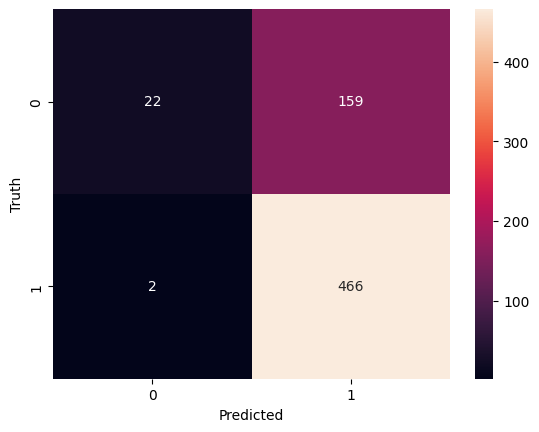

In [134]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')

plt.xlabel("Predicted")
plt.ylabel("Truth")

In [122]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       181
         1.0       0.72      1.00      0.84       468

    accuracy                           0.72       649
   macro avg       0.36      0.50      0.42       649
weighted avg       0.52      0.72      0.60       649



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
